<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-7K/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/zomato.csv'
df_train = pd.read_csv(url, encoding='latin-1')
df_train['rating_cat'] = df_train['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
df_train.rename(columns = {'Aggregate rating':'rating_num', 'Has Table booking': 'Book', 'Has Online delivery': 'On_deliver', 'Is delivering now':'Cur_deliver', 
                          'Switch to order menu' : 'Switch_menu', 'Average Cost for two' : 'Avg_cost_two', 'Price range' : 'Pr_range'}, inplace = True)
df_train.drop(['Rating color', 'Rating text'], axis = 1 ,inplace= True)

print('Original Train Row: ', df_train.shape[0])
#df_test = df_train.loc[df_train.rating_cat == -1, :].copy()
df_train = df_train.loc[df_train.rating_cat != -1, :].copy()
print('Train Row : ', df_train.shape[0])
#print('Test Row : ', df_test.shape[0])

Original Train Row:  9551
Train Row :  7403


In [ ]:
df_train

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Avg_cost_two,Currency,Book,On_deliver,Cur_deliver,Switch_menu,Pr_range,rating_num,Votes,rating_cat
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,314,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,591,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,270,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,365,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,229,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,788,4
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,1034,4
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,661,3
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,901,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


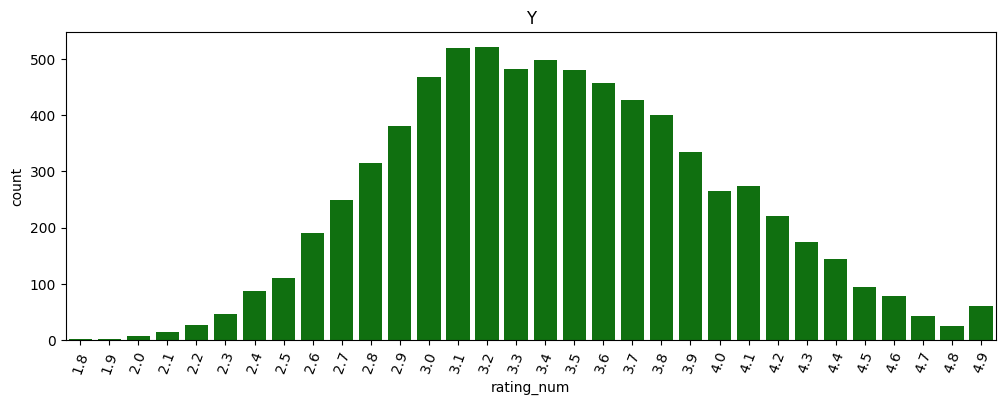

In [ ]:
rating = ['rating_num', 'rating_cat']

f, ax = plt.subplots(1,1, figsize = (12, 4))
sns.countplot(df_train['rating_num'], ax = ax, color = 'green')
ax.tick_params('x', rotation = 70)
ax.set_title('Y')
plt.show()

In [ ]:
print('ID # / Name #')
df_train[['Restaurant ID','Restaurant Name']].apply(pd.Series.nunique, axis = 0)

ID # / Name #


Restaurant ID      7403
Restaurant Name    5711
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


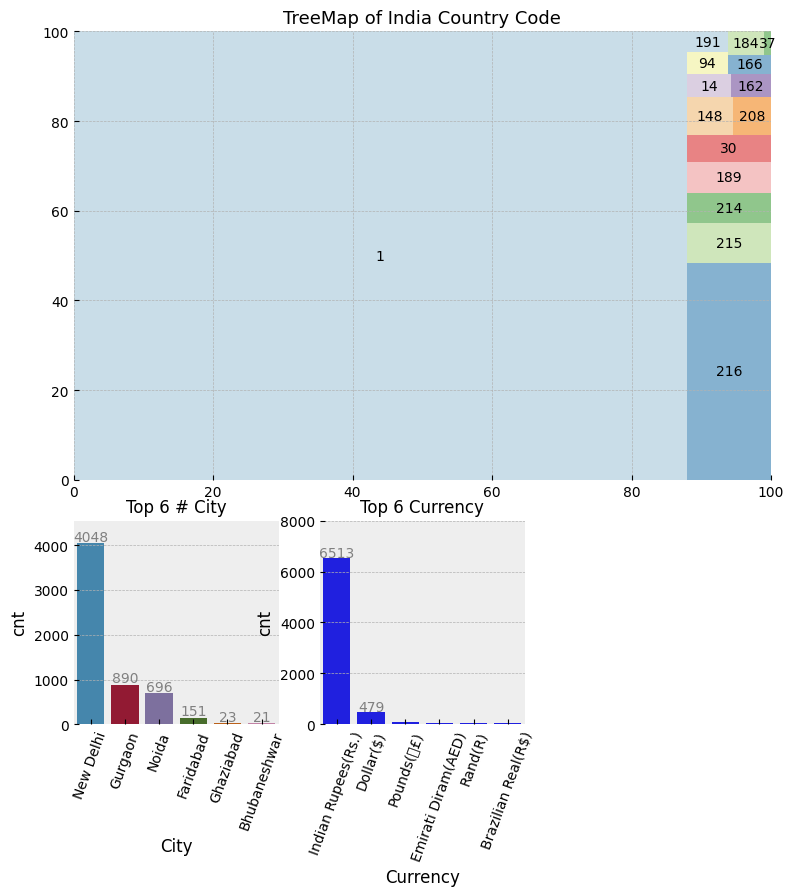

City #  141
Currency #  12
Country Code #  15


In [ ]:
with plt.style.context('bmh'):
    f = plt.figure(figsize = (9,9))
    ax = plt.subplot2grid((3,3),(0,0), colspan = 3, rowspan = 2)
    #df_train[['Longitude', 'Latitude']].plot.hexbin(x='Longitude', y = 'Latitude', gridsize = 10, vmin = 100, vmax = 700, ax = ax)
    #ax.text(80, 40, 'India', color = 'red')
    #ax.text(-100, 45, 'USA', color = 'red')
    #ax.text(0,5, 'Missing Pos', color = 'grey')
    #ax.set_title('Controlled Plot')
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    cnt = df_train['Country Code'].value_counts().to_frame()
    squarify.plot(sizes = cnt.values, label = cnt.index,
                  color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
    ax.set_title("TreeMap of India Country Code", fontsize = 13)


    ax = plt.subplot2grid((3,3),(2,0))
    cnt = df_train['City'].value_counts().reset_index()
    cnt.rename(columns = {'index':'City', 'City':'cnt'}, inplace = True)
    sns.barplot(x = 'City', y = 'cnt', data = cnt.head(6), ax = ax)
    ax.tick_params(axis='x', rotation=70)
    ax.set_title('Top 6 # City', size = 12)
    ax.set_ylim([0, cnt['cnt'].head(1).values+500])
    for i, val in enumerate(cnt['cnt'].head(6)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')

    ax = plt.subplot2grid((3,3),(2,1))
    cnt = df_train['Currency'].value_counts().reset_index()
    cnt.rename(columns = {'index':'Currency', 'Currency':'cnt'}, inplace = True)
    sns.barplot(x = 'Currency', y = 'cnt', data =cnt.head(6), color = 'b', ax = ax)
    ax.set_title('Top 6 Currency', size = 12)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylim([0, 8000])
    for i, val in enumerate(cnt['cnt'].head(2)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
    sns.despine(left=True, bottom=True)
    plt.show()

    
    
print('City # ', df_train['City'].nunique())
print('Currency # ', df_train['Currency'].nunique())
print('Country Code # ', df_train['Country Code'].nunique())

In [ ]:
tr_USA = df_train.loc[df_train['Country Code'] == 216,['Latitude', 'Longitude']]
map_F = folium.Map(location = [35, -92], zoom_start = 4)
for i, (lat, lon) in enumerate(tr_USA.values): folium.Marker([lat, lon]).add_to(map_F)
map_F

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/zomato.csv'
df_train = pd.read_csv(url, encoding='latin-1')
df_train['rating_cat'] = df_train['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
df_train.rename(columns = {'Aggregate rating':'rating_num', 'Has Table booking': 'Book', 'Has Online delivery': 'On_deliver', 'Is delivering now':'Cur_deliver', 
                          'Switch to order menu' : 'Switch_menu', 'Average Cost for two' : 'Avg_cost_two', 'Price range' : 'Pr_range'}, inplace = True)
df_train.drop(['Rating color', 'Rating text'], axis = 1 ,inplace= True)

df_test = df_train.loc[df_train.rating_cat == -1, :].copy()
df_train = df_train.loc[df_train.rating_cat != -1, :].copy()

df_city = df_train.loc[(df_train['Country Code'] == 1) & (df_train['City'] == 'New Delhi'), :]
df_city.drop(['Country Code', 'City', 'Locality Verbose', 'Currency'], axis = 1, inplace = True)
df_city = df_city.loc[df_city['Longitude'] != 0, :]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tmp = df_city['rating_num'].map(np.round)
a = np.full(tmp.shape[0], False, dtype = bool)
print('Round')
((tmp - df_city['rating_cat']).map(np.round)).value_counts()

Round


 1.0    3490
 0.0     378
 2.0      96
-1.0      11
dtype: int64

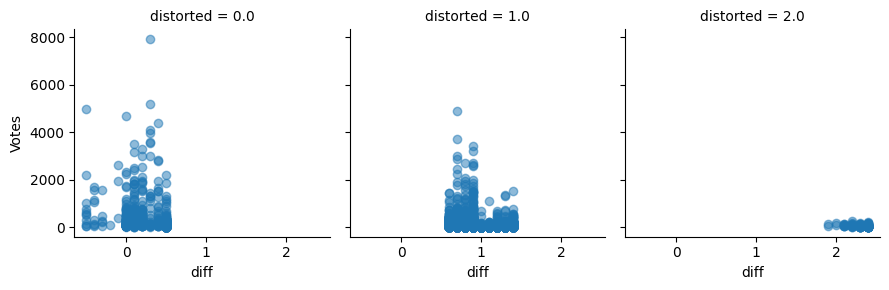

In [ ]:
sys_check = df_city[['rating_num', 'rating_cat', 'Votes']].copy()
sys_check['distorted'] = (df_city['rating_num'] - df_city['rating_cat']).map(np.round)
sys_check['diff'] = sys_check['rating_num'] - sys_check['rating_cat']
g = sns.FacetGrid(data =sys_check, col = 'distorted')
g = g.map(plt.scatter, 'diff', 'Votes', alpha = 0.5)
plt.show()

In [ ]:
df_city = df_city.loc[sys_check['distorted'] != 2, :]
df_city['rating_cat'] = df_city['rating_num'].round(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


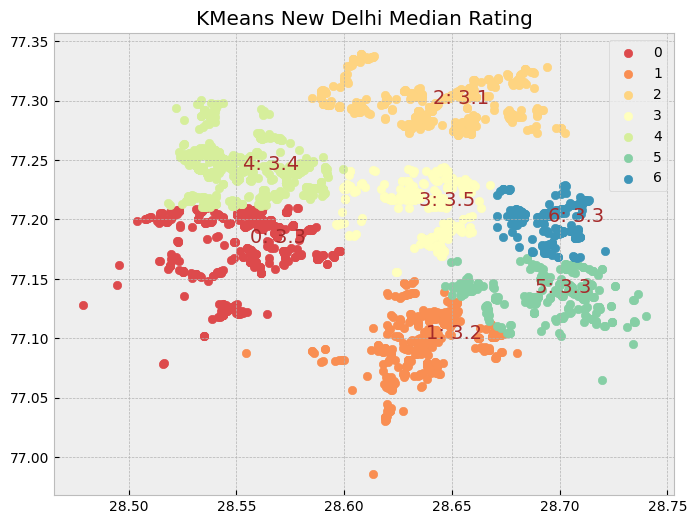

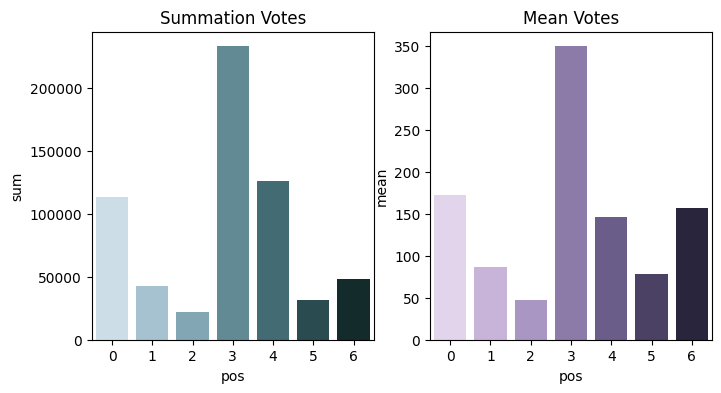

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_city[['Longitude', 'Latitude']])
df_city['pos'] = kmeans.labels_
pop_local = df_city.groupby('pos')['Longitude', 'Latitude', 'rating_num'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'rating_num':np.median}).reset_index()

with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 7)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ix = df_city.pos == i
        plt.scatter(df_city.loc[ix, 'Latitude'], df_city.loc[ix, 'Longitude'], color = pal[i], label = str(i))
        plt.text(pop_local.loc[i, 'Latitude'], pop_local.loc[i, 'Longitude'], str(i) + ': '+str(pop_local.loc[i, 'rating_num'].round(2)), fontsize = 14, color = 'brown')
    plt.title('KMeans New Delhi Median Rating')
    plt.legend()
    plt.show()
    
votes_area = df_city.groupby('pos').agg({'Votes': [np.sum, np.mean]})
votes_area.columns = votes_area.columns.droplevel(0)
votes_area.reset_index(inplace = True)
plt.figure(figsize = (8,4))
ax = plt.subplot(1,2,1)
sns.barplot(x = 'pos', y = 'sum', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 2.4, rot = .1), ax = ax)
ax.set_title('Summation Votes')

ax = plt.subplot(1,2,2)
sns.barplot(x = 'pos', y = 'mean', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 3, rot = .1), ax = ax)
ax.set_title('Mean Votes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


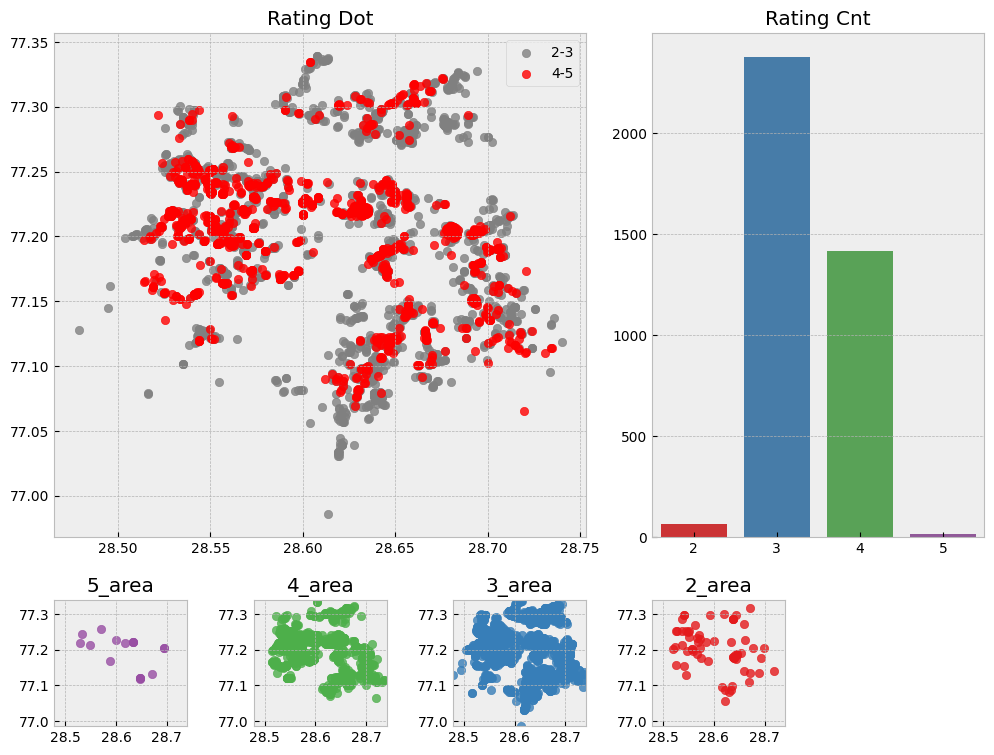

In [ ]:
with plt.style.context('bmh', after_reset=True):
    plt.figure(figsize = (12,9))

    cat = sorted(df_city['rating_cat'].unique())
    ax = plt.subplot2grid((4,5), (0,0), colspan = 3, rowspan = 3)
    pal = sns.color_palette('Set1', len(cat))
    ix = df_city.rating_cat.isin((2,3))
    ax.scatter(df_city.loc[ix, 'Latitude'], df_city.loc[ix, 'Longitude'], color = 'gray', label = '2-3', alpha = 0.8)
    ax.scatter(df_city.loc[~ix, 'Latitude'], df_city.loc[~ix, 'Longitude'], color = 'red', label = '4-5', alpha = 0.8)
    ax.legend()
    ax.set_title('Rating Dot')

    ax = plt.subplot2grid((4,5), (0,3), colspan = 2, rowspan = 3)
    tmp = df_city['rating_cat'].value_counts().sort_index()
    sns.barplot(tmp.index, tmp.values, palette= pal)
    ax.set_title('Rating Cnt')


    cat = sorted(df_city['rating_cat'].unique().tolist())
    x_lm = [df_city['Latitude'].min(), df_city['Latitude'].max()]
    y_lm = [df_city['Longitude'].min(), df_city['Longitude'].max()]
    for i, c in enumerate(reversed(cat)):
        ax = plt.subplot2grid((4,5), (3,i))
        ix = df_city.rating_cat == c
        ax.scatter(df_city.loc[ix, 'Latitude'], df_city.loc[ix, 'Longitude'], color = pal[len(cat)-1-i], alpha = 0.8)
        ax.set_xlim(x_lm)
        ax.set_ylim(y_lm)
        ax.set_title(str(c) + '_area')
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    plt.show()


In [ ]:
change_ref = {'No':0, 'Yes':1}
for col in ['Book', 'On_deliver', 'Cur_deliver']: df_city[col] = df_city[col].map(change_ref)

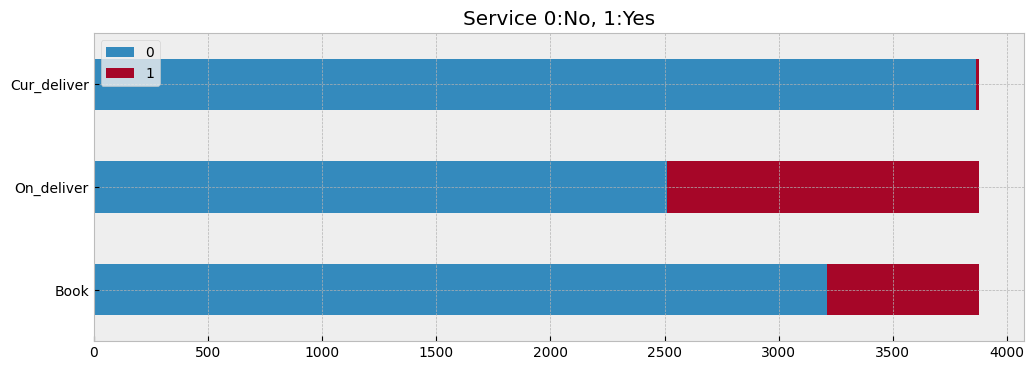

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

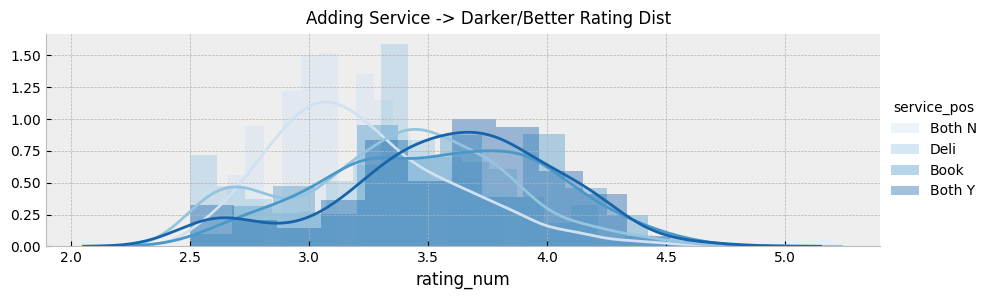

In [ ]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['Book', 'On_deliver', 'Cur_deliver']: 
        tmp[col] = df_city[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Service 0:No, 1:Yes')
    plt.show()


def func(r):
    # 1 : Only Deliver, 2: Del + Book 3: Only Book 4: Both OK
    i, j = r.Book, r.On_deliver
    if i == 0 and j == 0: return 'Both N'
    elif i == 0 and j == 1: return 'Deli'
    elif i == 1 and j == 0: return 'Book'
    else: return 'Both Y'
df_city['service_pos'] = df_city[['Book', 'On_deliver']].apply(func, axis = 1)

with plt.style.context('bmh', after_reset = True):
    g = sns.FacetGrid(data = df_city, hue = 'service_pos', hue_order = ['Both N', 'Deli', 'Book', 'Both Y'], palette = "Blues", size = 3, aspect = 3)
    g.map(sns.distplot, 'rating_num')
    g.add_legend()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Adding Service -> Darker/Better Rating Dist')
    plt.show()


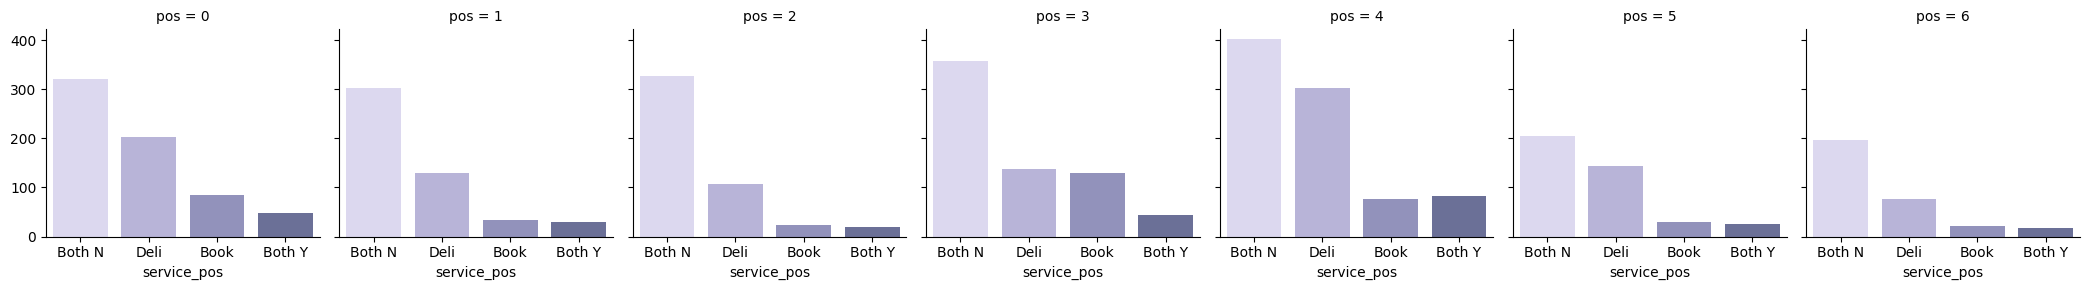

In [ ]:
g = sns.FacetGrid(data =df_city, col = 'pos', col_order = [i for i in range(7)])
g.map(sns.countplot, 'service_pos', order = ['Both N', 'Deli', 'Book', 'Both Y'], palette = sns.cubehelix_palette(start=2.8, rot=.1))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/py

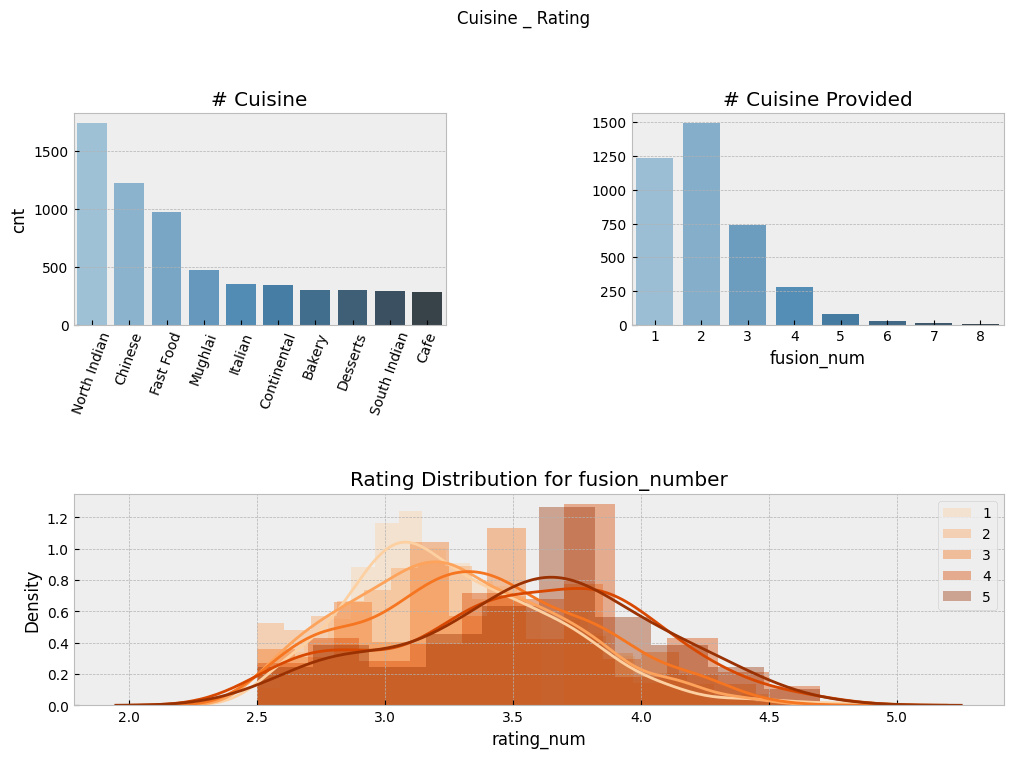

# Unique Cuisine:  78


In [ ]:
df_city['Cuisines'] = df_city['Cuisines'].astype(str)
df_city['fusion_num'] = df_city['Cuisines'].apply(lambda x: len(x.split(',')))

from collections import Counter
lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in df_city['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)


tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (12, 8))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('Blues_d', 10))
    ax.set_title('# Cuisine')
    ax.tick_params(axis='x', rotation=70)
    ax = plt.subplot2grid((2,2), (0,1))
    sns.countplot(df_city['fusion_num'], ax=ax, palette = sns.color_palette('Blues_d', df_city.fusion_num.nunique()))
    ax.set_title('# Cuisine Provided')
    ax.set_ylabel('')

    ax = plt.subplot2grid((2,2), (1,0), colspan = 2)
    fusion_rate = df_city[['fusion_num', 'rating_cat', 'rating_num']].copy()
    fusion_rate.loc[fusion_rate['fusion_num'] > 5,'fusion_num'] = 5
    fusion_rate = fusion_rate.loc[fusion_rate.rating_cat != -1, :]
    pal = sns.color_palette('Oranges', 11)
    for i in range(1,6):
        num_ix = fusion_rate['fusion_num'] == i
        sns.distplot(fusion_rate.loc[num_ix, 'rating_num'], color = pal[i*2], label = str(i), ax = ax)
        ax.legend()
        ax.set_title('Rating Distribution for fusion_number')

    plt.subplots_adjust(wspace = 0.5, hspace = 0.8, top = 0.85)
    plt.suptitle('Cuisine _ Rating')
    plt.show()        
print('# Unique Cuisine: ', len(lst_cuisine))


In [ ]:
south_asia = ['Afghani','Andhra','Awadhi', 'Bengali','Biryani',  'Burmese', 'Chettinad', 'Deli','Goan', 'Gujarati', 'Hyderabadi', 'Kashmiri','Kerala', 'Lebanese','Lucknowi', 'Maharashtrian','Mangalorean',
 'Mithai', 'Modern Indian', 'Moroccan', 'Mughlai','Naga', 'Nepalese', 'North Eastern', 'North Indian','Oriya', 'Parsi', 'Rajasthani','South Indian', 'Tex-Mex','Sri Lankan',
'Indian','Indonesian', 'Tibetan']
africa = ['African']
america = ['American','Mexican', 'South American']
europe = ['British', 'European', 'French','Italian', 'Mediterranean','Middle Eastern', 'Portuguese','Spanish', 'Continental']
west_asia = ['Arabian','Turkish','Iranian']
east_asia = ['Asian', 'Chinese','Japanese', 'Korean', 'Malaysian', 'Thai','Vietnamese',  'Sushi']
kind_food = set(['Bakery', 'Beverages','Burger','Cafe', 'Desserts','Drinks Only', 'Fast Food', 'Finger Food','Healthy Food', 'Ice Cream', 'Juices','Pizza','Raw Meats','Salad','Sandwich','Seafood','Street Food',
 'Tea'])
country = lst_cuisine - set(kind_food)

def kind_country_cu(lst, kind_food = kind_food, country = country):
    lst = lst.split(',')
    tmp1 = [var for var in lst if var in kind_food]
    tmp2 = [var for var in lst if var in country]
    if not tmp1: tmp1 = ['None']
    if not tmp2: tmp2 = ['None']
    return tmp1, tmp2
df_city['food_cu'], df_city['count_cu'] = zip(*df_city['Cuisines'].apply(kind_country_cu))

def get_popular(data):
    Cnt_cuisine = Counter()
    for cu_lst in data:
        for cu in cu_lst:
            if cu != 'None':
                Cnt_cuisine[cu.strip()] += 1
    cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
    cnt.sort_values(0, ascending = False, inplace = True)
    return cnt

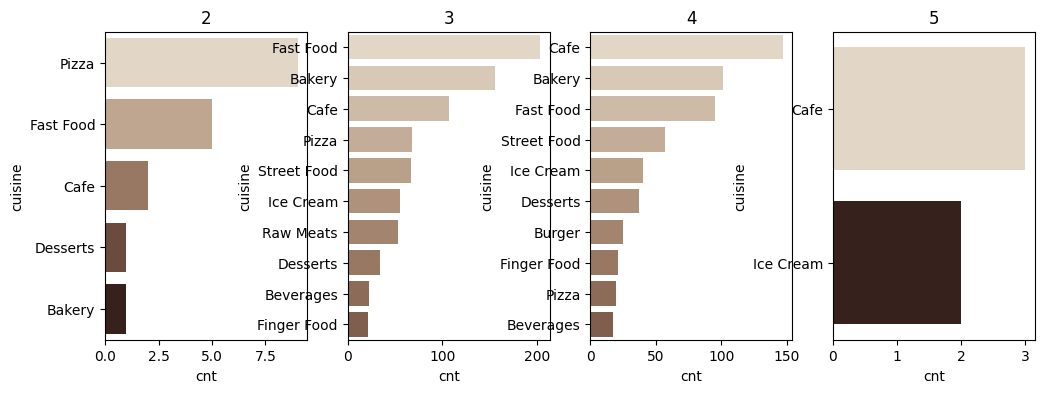

In [ ]:
rat_cu = df_city['food_cu'].groupby(df_city['rating_cat'])
tmp_cnt = {}
for i in [2,3,4,5]:
    data = rat_cu.get_group(i)
    tmp_cnt[i] = get_popular(data)

f, ax = plt.subplots(1,4, figsize = (12,4))
for i in [2,3,4,5]:
    tmp = tmp_cnt[i].reset_index()
    tmp.columns = ['cuisine', 'cnt']
    sns.barplot(y = 'cuisine', x = 'cnt', data = tmp.head(10), ax = ax[i-2], palette = sns.cubehelix_palette(n_colors = tmp.shape[0], start = 1, rot = 0.1))
    ax[i-2].set_title(str(i))
    #ax[i-2].tick_params('x', rotation = 90)
plt.show()

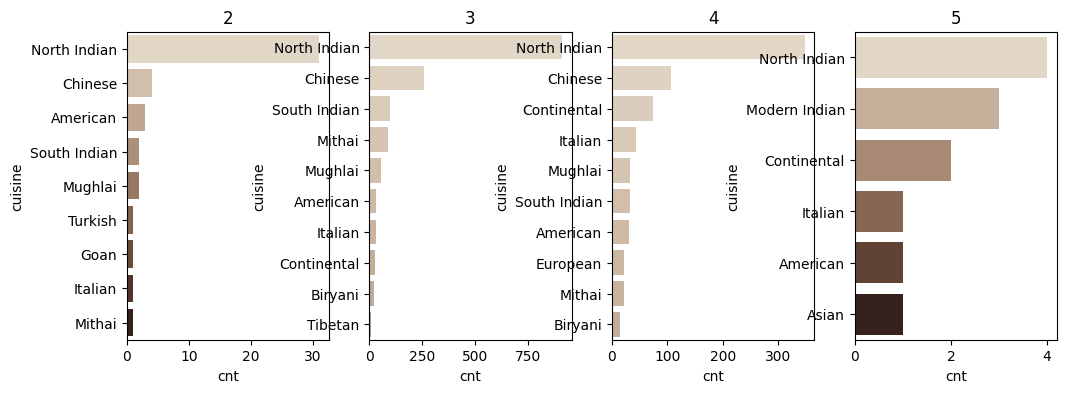

In [ ]:
rat_cu = df_city['count_cu'].groupby(df_city['rating_cat'])
tmp_cnt = {}
for i in [2,3,4,5]:
    data = rat_cu.get_group(i)
    tmp_cnt[i] = get_popular(data)

f, ax = plt.subplots(1,4, figsize = (12,4))
for i in [2,3,4,5]:
    tmp = tmp_cnt[i].reset_index()
    tmp.columns = ['cuisine', 'cnt']
    sns.barplot(y = 'cuisine', x = 'cnt', data = tmp.head(10), ax = ax[i-2], palette = sns.cubehelix_palette(n_colors = tmp.shape[0], start = 1, rot = 0.1))
    ax[i-2].set_title(str(i))
    #ax[i-2].tick_params('x', rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


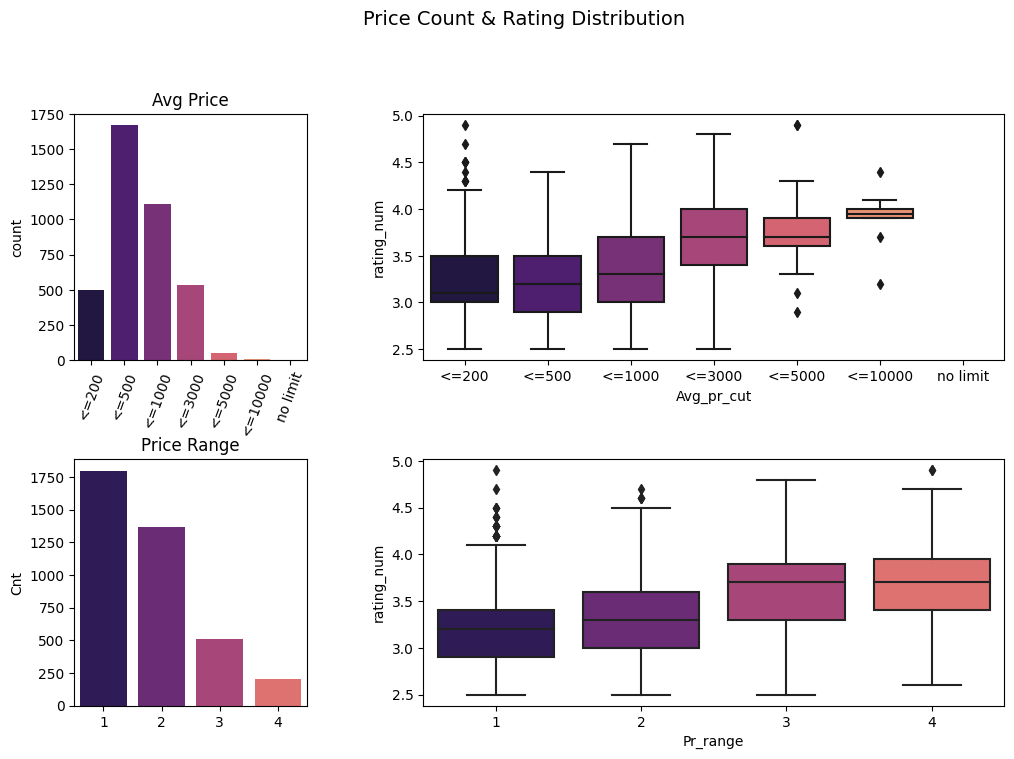

In [ ]:
f = plt.figure(figsize = (12,8))
df_city['Avg_pr_cut'] = pd.cut(df_city['Avg_cost_two'], bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000], labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no limit'])
ax = plt.subplot2grid((2,3), (0,0))
sns.countplot(df_city['Avg_pr_cut'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Avg Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,3), (0,1), colspan = 2)
sns.boxplot(x = 'Avg_pr_cut', y = 'rating_num', data = df_city, ax = ax, palette = sns.color_palette('magma', 7))

cnt = df_city['Pr_range'].value_counts().reset_index()
cnt.columns = ['Pr_range', 'Cnt']
ax = plt.subplot2grid((2,3), (1,0))
sns.barplot(x = 'Pr_range', y = 'Cnt', data = cnt, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,3), (1,1), colspan = 2)
sns.boxplot(x='Pr_range', y ='rating_num', data = df_city, ax = ax, palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.5, hspace = 0.4, top = 0.85)
plt.suptitle('Price Count & Rating Distribution', size = 14)
plt.show()